In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

%matplotlib inline

In [2]:
raw_data = pd.read_csv('data/mushrooms.csv')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
print(raw_data.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [6]:
print(raw_data.groupby('class').size())

class
e    4208
p    3916
dtype: int64


In [7]:
caps = raw_data[['class','cap-shape','cap-surface','cap-color']]

In [8]:
caps.head()

,class,cap-shape,cap-surface,cap-color
0,p,x,s,n
1,e,x,s,y
2,e,b,s,w
3,p,x,y,w
4,e,x,s,g


In [9]:
gills = raw_data[['class','gill-attachment','gill-spacing','gill-size','gill-color']]

In [10]:
stalks = raw_data[['class','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring']]

In [11]:
veils = raw_data[['class','veil-type','veil-color']]

In [12]:
rings = raw_data[['class','ring-number','ring-type']]

In [13]:
other_characteristics = raw_data[['class','bruises','odor','spore-print-color','population','habitat']]

/tmp/ipykernel_2468/2884116829.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8), dpi=75)


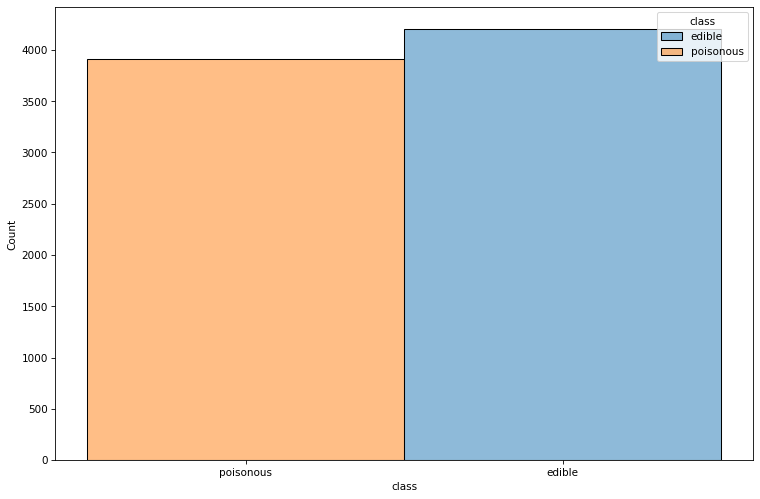

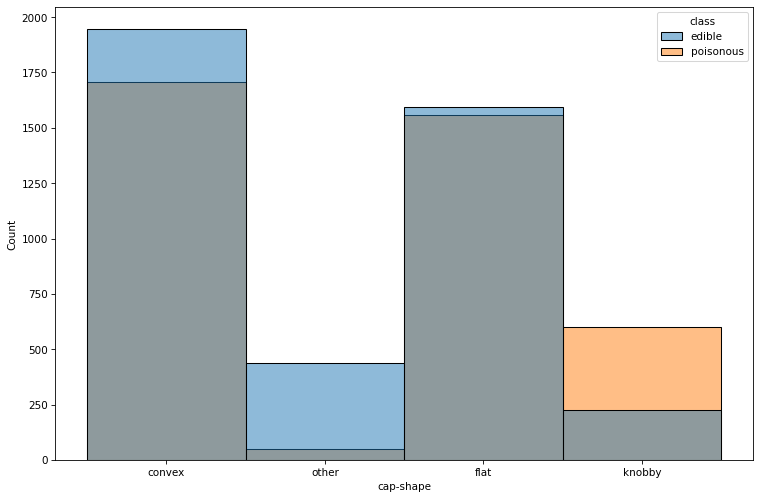

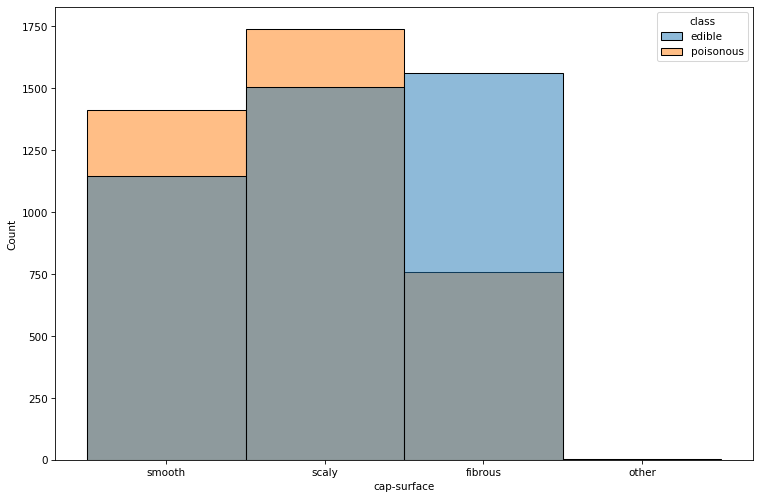

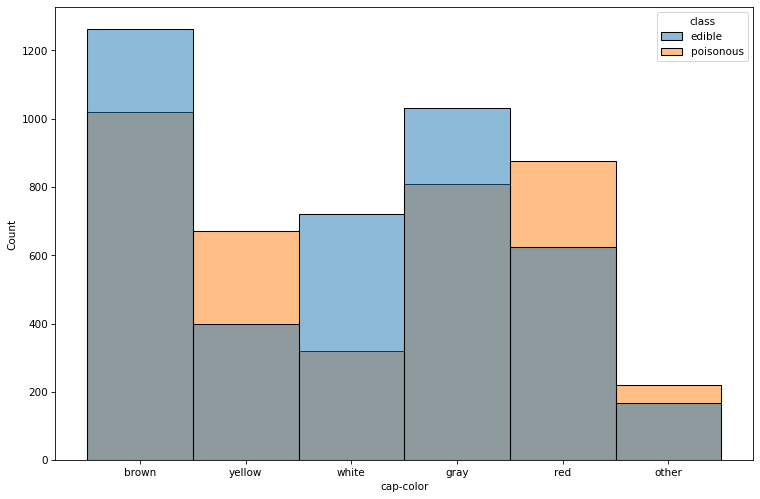

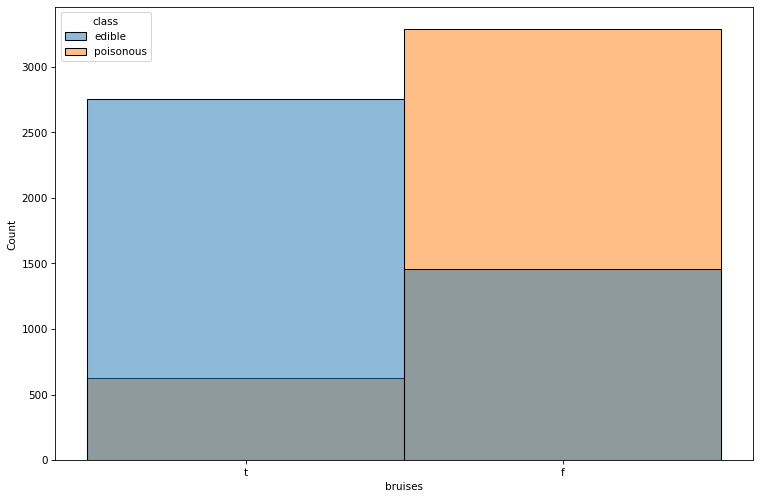

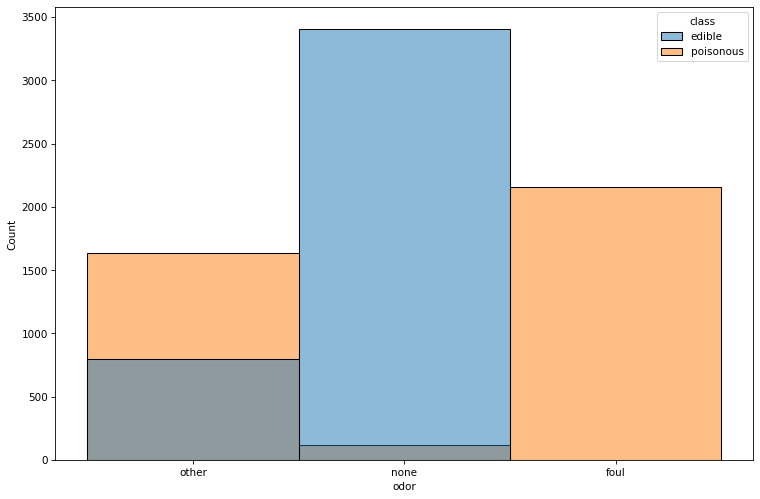

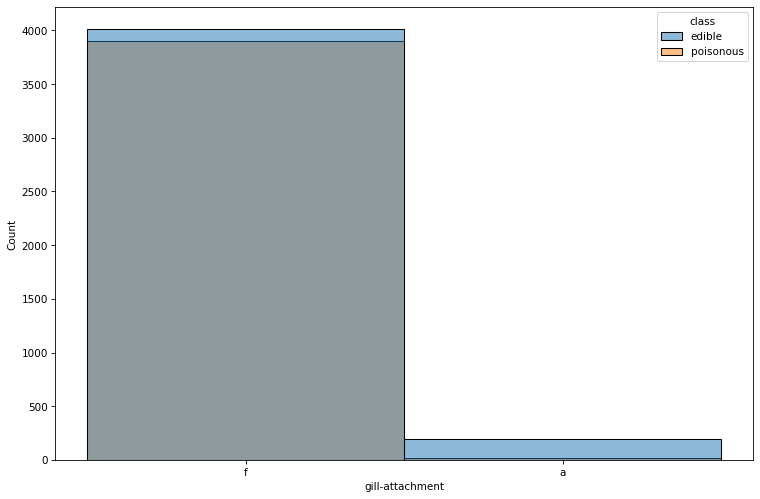

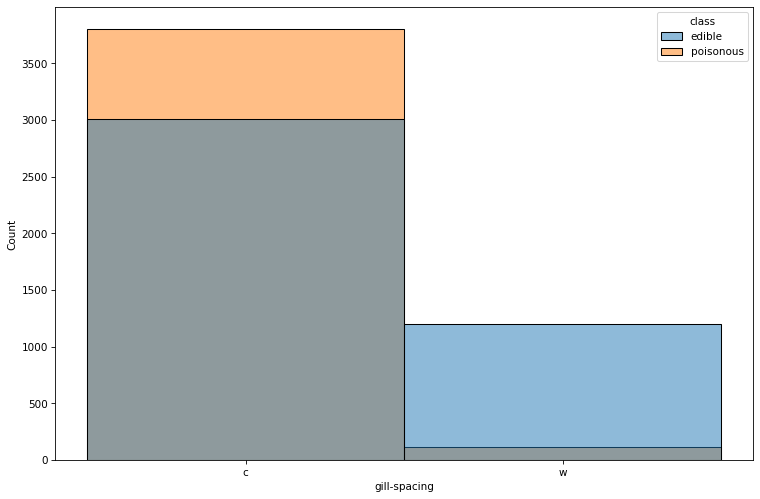

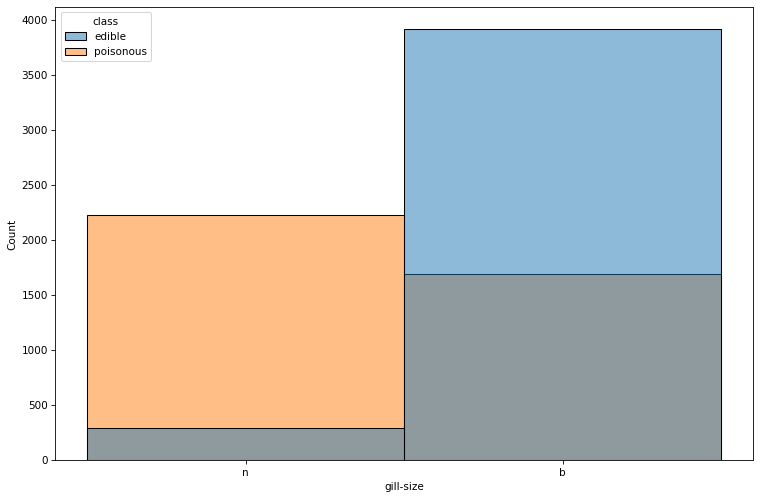

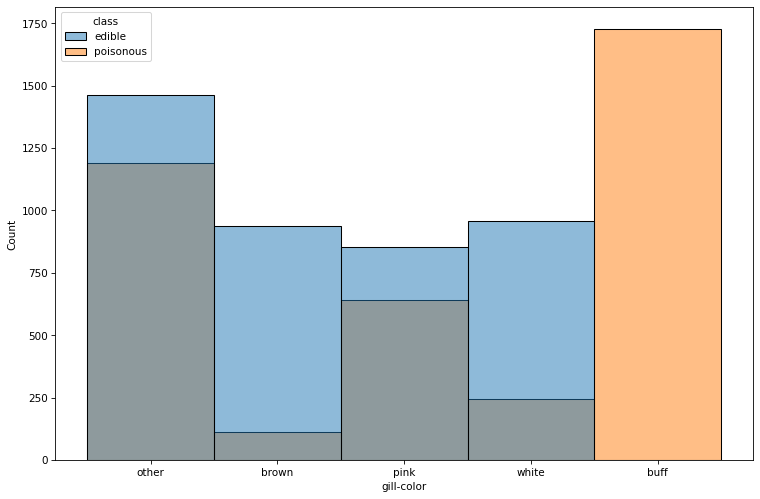

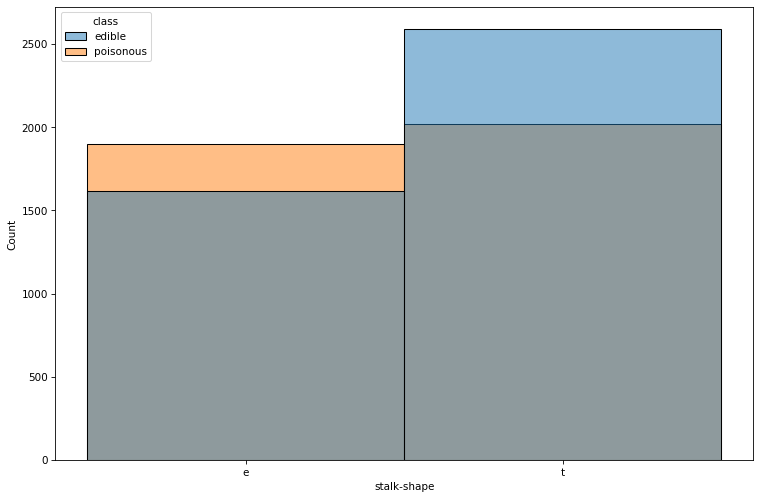

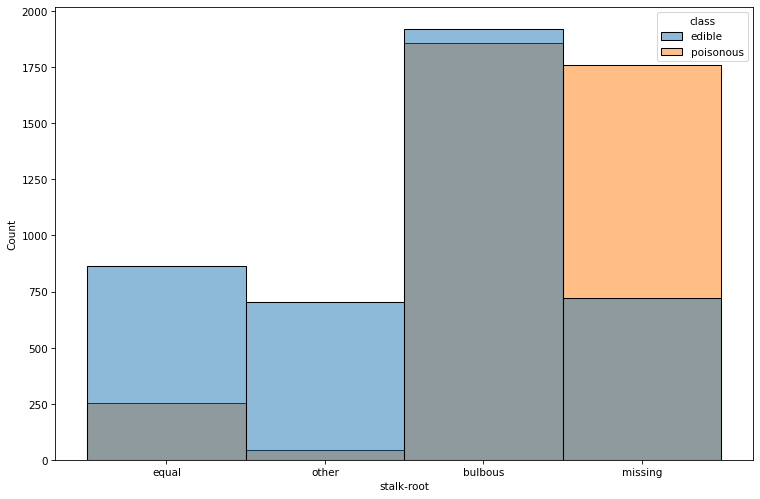

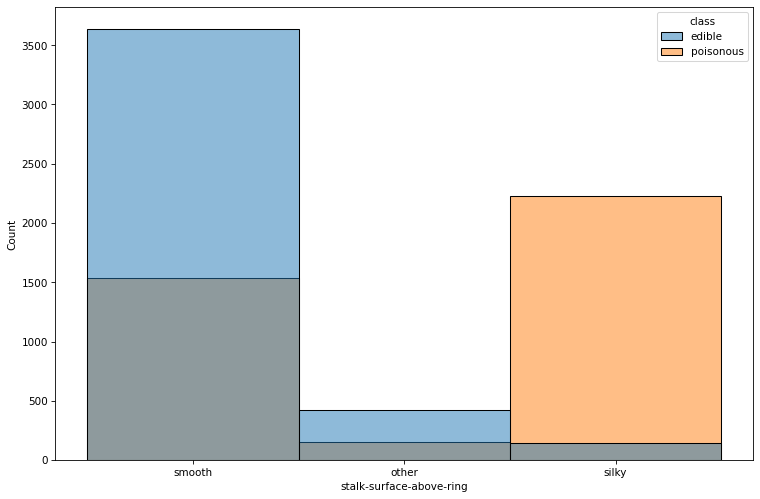

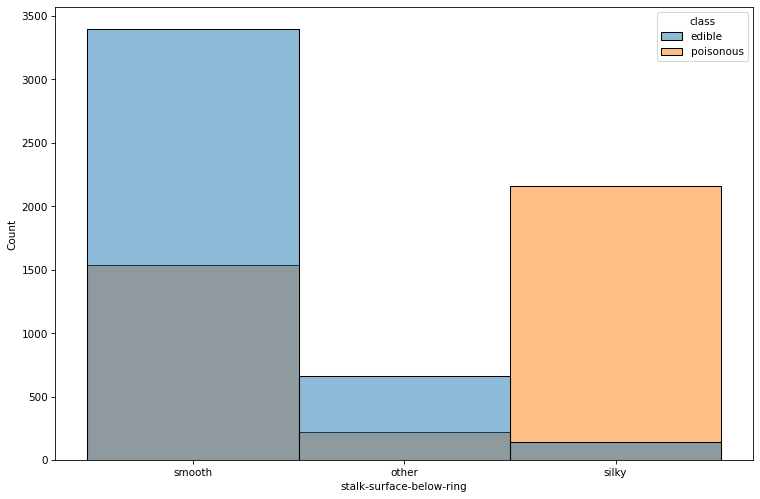

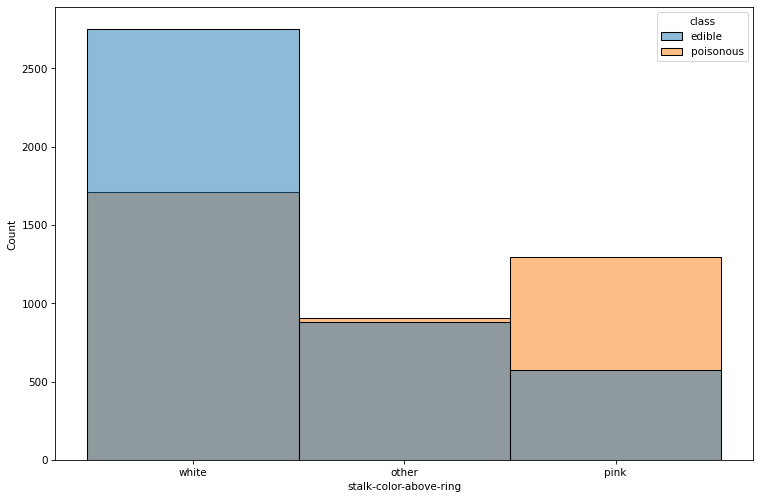

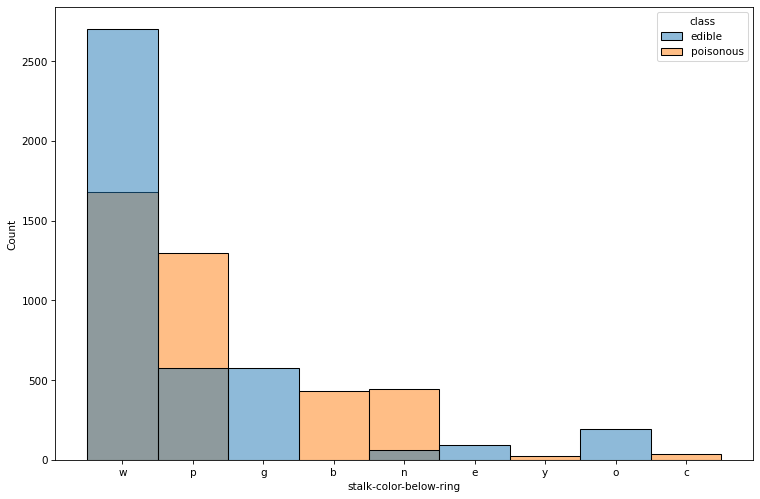

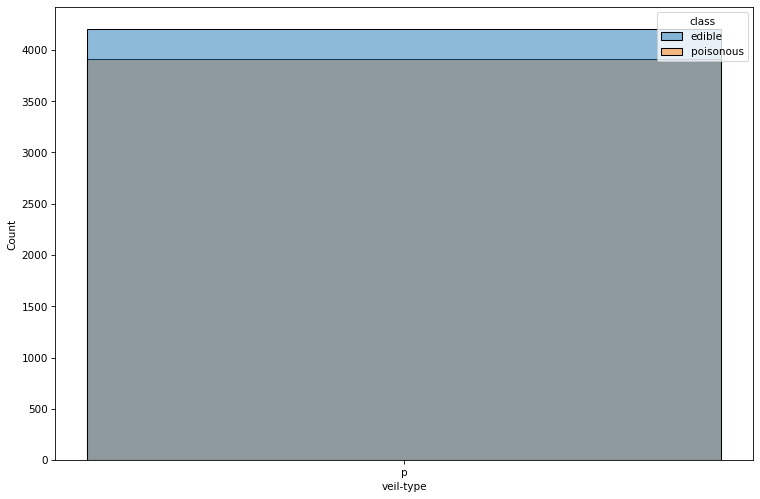

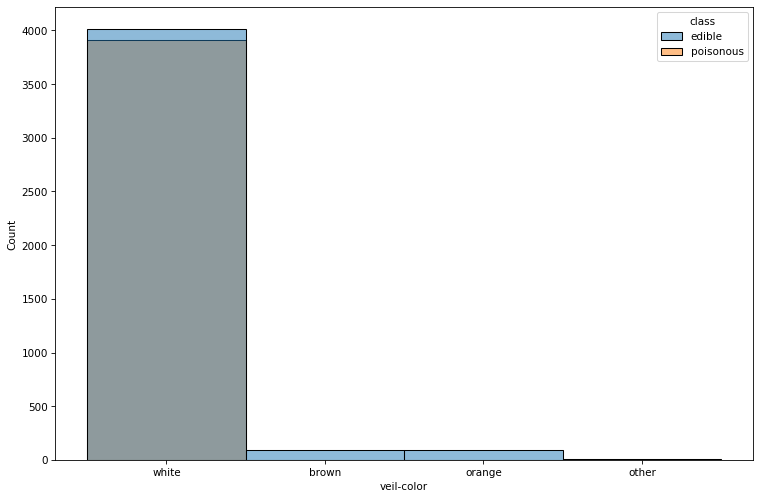

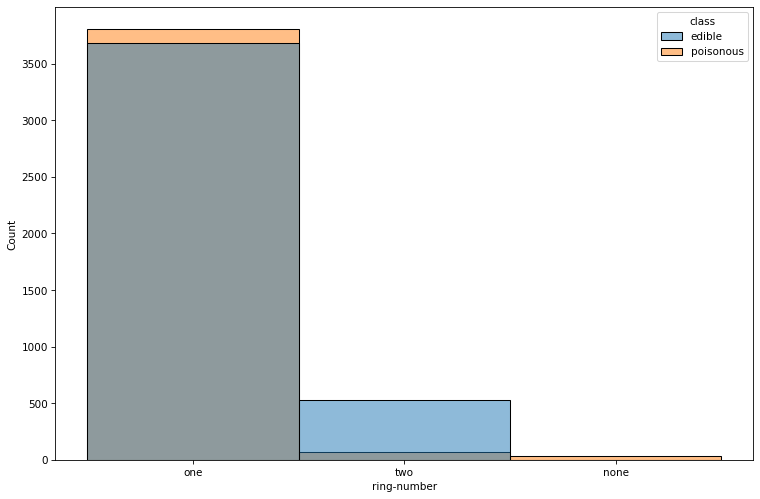

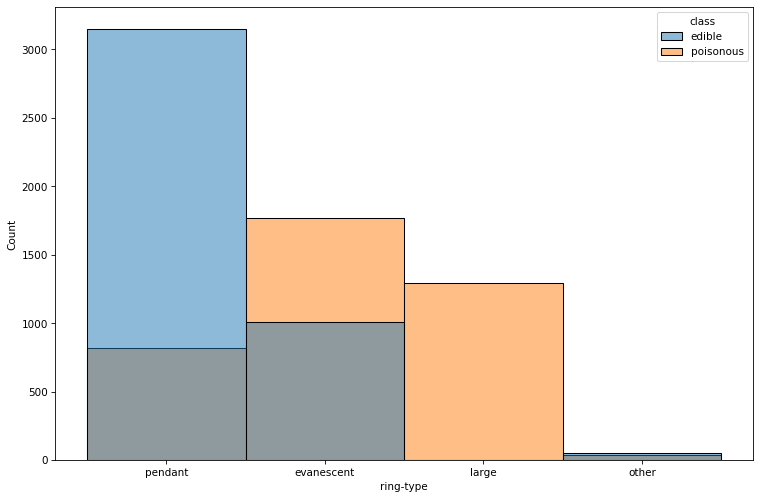

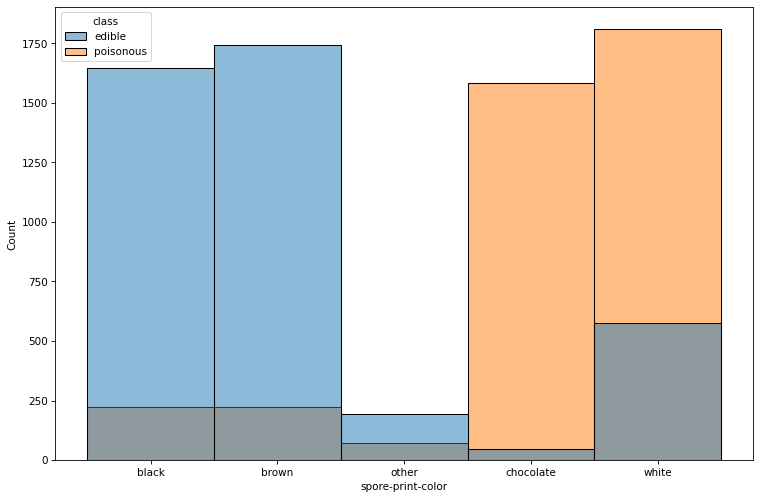

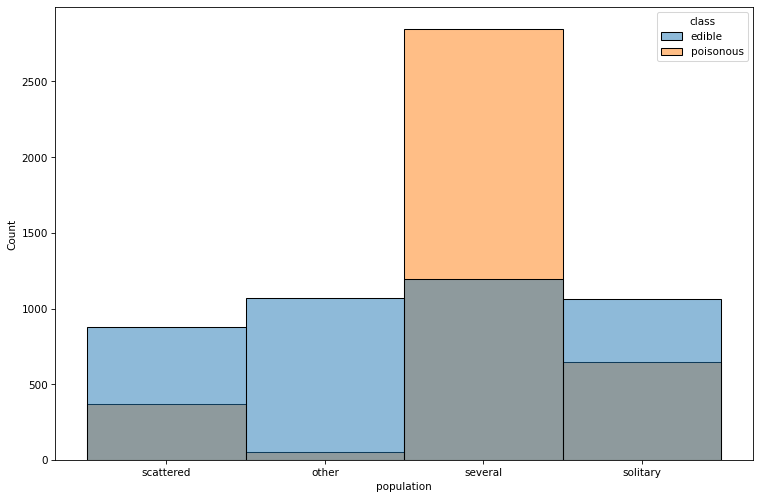

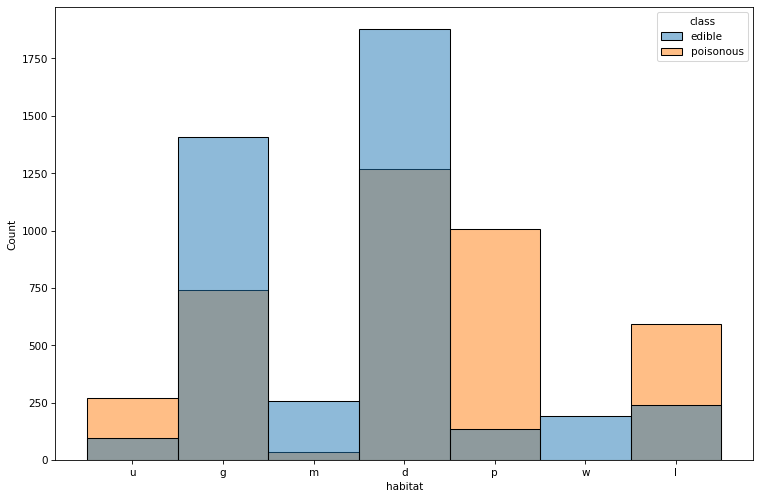

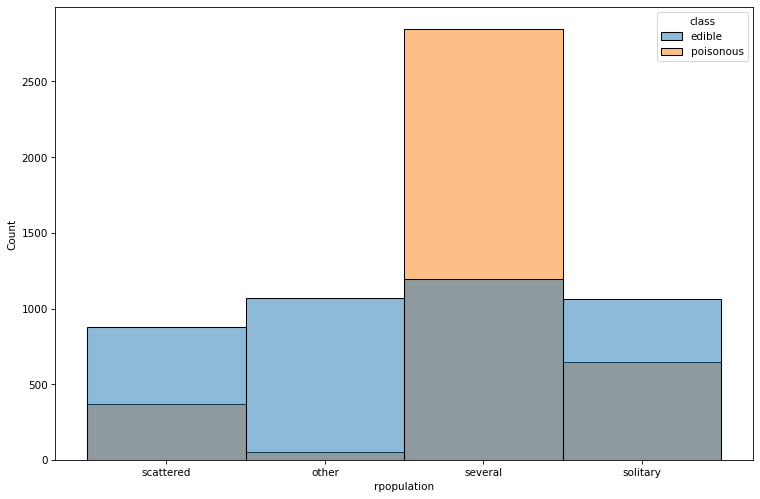

In [73]:
## modify to groupby target

for column in raw_data.columns:
    plt.figure(figsize=(12,8), dpi=75)
    sns.histplot(raw_data, x=column, hue='class', hue_order=['edible','poisonous'])

### Important Features?

- habitat (woods, grasses, other)
- population (several, solitary, scattered, other)
- ring number (one, two)
- veil color (white, other)
- stalk shape (enlarging, tapering)
- stalk root (bulbous, MISSING, other)
- gill size (broad, narrow)
- gill spacing (close, crowded)
- bruises (true, false)
- odor (none, foul other)
- cap shape (convex, flat, other)
- gill attachment (attached, free)


### Definitions:

- False Positive: A mushroom that is poisonous has been incorrrectly classified as edible.
- False Negative: A mushroom that is edible has been incorrectly classified as poisonous.
- Positive: A mushroom has been classified as edible.
- Negative: A mushroom has been identied as not edible (poisonous).
- It will probably be important to go for probabilities of +/- instead of hard predictions; >= 80% confidence to classify a mushroom as edible? Serious consequences for false positives.

In [15]:
capshape_map = {'x':'convex', 'f':'flat', 'k':'knobby', 's':'other', 'c':'other', 'b':'other'}
raw_data['cap-shape'] = raw_data['cap-shape'].map(capshape_map)

capsurface_map = {'s':'smooth', 'y':'scaly', 'f':'fibrous', 'g':'other'}
raw_data['cap-surface'] = raw_data['cap-surface'].map(capsurface_map)

capcolor_map = {'n':'brown', 'y':'yellow', 'w':'white', 'e':'red', 'g':'gray', 'b':'other', 'c':'other', 'r':'other', 'p':'other','u':'other'}
raw_data['cap-color'] = raw_data['cap-color'].map(capcolor_map)

odor_map = {'n':'none', 'f':'foul', 'a':'other', 'l':'other', 'c':'other', 'y':'other', 'm':'other', 'p': 'other', 's': 'other'}
raw_data['odor'] = raw_data['odor'].map(odor_map)

gillcolor_map = {'b':'buff', 'w':'white', 'p':'pink', 'n':'brown', 'k':'other', 'g':'other', 'h':'other', 'u':'other', 'e':'other', 'r':'other', 'y':'other', 'o':'other'}
raw_data['gill-color'] = raw_data['gill-color'].map(gillcolor_map)

stalkroot_map = {'b':'bulbous', '?':'missing', 'e':'equal', 'c':'other', 'r':'other'}
raw_data['stalk-root'] = raw_data['stalk-root'].map(stalkroot_map)

stalksurfaceabovering_map = {'s':'smooth', 'k':'silky', 'f':'other', 'y':'other'}
raw_data['stalk-surface-above-ring'] = raw_data['stalk-surface-above-ring'].map(stalksurfaceabovering_map)

stalksurfacebelowring_map = {'s':'smooth', 'k':'silky', 'f':'other', 'y':'other'}
raw_data['stalk-surface-below-ring'] = raw_data['stalk-surface-below-ring'].map(stalksurfacebelowring_map)

stalkcolorabovering_map = {'w':'white', 'p':'pink', 'g':'other', 'n':'other', 'b':'other', 'e':'other', 'o':'other', 'c':'other', 'y':'other'}
raw_data['stalk-color-above-ring'] = raw_data['stalk-color-above-ring'].map(stalkcolorabovering_map)

veilcolor_map = {'w':'white', 'n':'brown', 'o':'orange', 'y':'other'}
raw_data['veil-color'] = raw_data['veil-color'].map(veilcolor_map)

ringnumber_map = {'o':'one', 't':'two', 'n':'none'}
raw_data['ring-number'] = raw_data['ring-number'].map(ringnumber_map)

ringtype_map = {'p':'pendant', 'e':'evanescent', 'l':'large', 'f':'other', 'n':'other'}
raw_data['ring-type'] = raw_data['ring-type'].map(ringtype_map)

sporeprint_map = {'k':'black', 'n':'brown', 'h':'chocolate', 'w':'white', 'u':'other', 'r':'other', 'o':'other', 'y':'other', 'b':'other'}
raw_data['spore-print-color'] = raw_data['spore-print-color'].map(sporeprint_map)

population_map = {'s':'scattered', 'v':'several', 'y':'solitary', 'n':'other', 'a':'other', 'c':'other'}
raw_data['rpopulation'] = raw_data['population'].map(population_map)

habitat_map = {'g':'grasses', 'd':'woods', 'p':'paths', 'l':'leaves', 'u':'other', 'm':'other', 'w':'other'}
raw_data['population'] = raw_data['population'].map(population_map)

class_map = {'e':'edible', 'p':'poisonous'}
raw_data['class'] = raw_data['class'].map(class_map)

In [16]:
raw_data['cap-shape']

0       convex
1       convex
2        other
3       convex
4       convex
         ...  
8119    knobby
8120    convex
8121      flat
8122    knobby
8123    convex
Name: cap-shape, Length: 8124, dtype: object

In [74]:
dummies = dummy_df.to_csv('dummy_data.csv')

In [17]:
#sns.pairplot(caps, vars=caps[1:])

In [18]:
#sns.pairplot(stalks, vars=stalks[1:])

In [19]:
#non_dummy_cols = ['class'] 
#dummy_cols = list(set(raw_data.columns) - set(non_dummy_cols))
dummy_df = pd.get_dummies(raw_data)

In [21]:
#dummy_df.info()

In [24]:
X = dummy_df.drop(columns=['class_edible','class_poisonous'])
y = raw_data[['class']]
y_dummy = dummy_df[['class_edible','class_poisonous']]

In [25]:
#X.info()

In [26]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   8124 non-null   object
dtypes: object(1)
memory usage: 63.6+ KB


In [27]:
# split data 80/20

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=101)

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X, y_dummy, train_size=0.8,test_size=0.2, random_state=101)
# do I need to further split the training data for cross validation? kFolds?

In [28]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 2430 to 4959
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   6499 non-null   object
dtypes: object(1)
memory usage: 101.5+ KB


In [29]:
#building basic models: logistic reg, kNN, decision trees, random forest

#models = []

#models.append(('LR', LogisticRegression(max_iter=8000, multi_class='ovr')))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('RF', RandomForestRegressor()))

#results = []
#names = []

#for name, model in models:
#	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
#	results.append(cv_results)
#	names.append(name)
#	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [47]:
mvp_lr = LogisticRegression(max_iter=8000)

mvp_lr.fit(X_train, y_train.values.ravel())

y_train_hat = mvp_lr.predict(X_train)
y_train_hat_probs = mvp_lr.predict_proba(X_train)[:,1]

train_accuracy = metrics.accuracy_score(y_train, y_train_hat)*100
train_auc_roc = metrics.roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', metrics.confusion_matrix(y_train, y_train_hat))
print('Training AUC: %.4f %%' % train_auc_roc)
print('Training accuracy: %.4f %%' % train_accuracy)
print(metrics.classification_report(y_train, y_train_hat))

Confusion matrix:
 [[3357    0]
 [   3 3139]]
Training AUC: 99.9997 %
Training accuracy: 99.9538 %
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      3357
   poisonous       1.00      1.00      1.00      3142

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



In [53]:
dummy_df.head()

,class_edible,class_poisonous,cap-shape_convex,cap-shape_flat,cap-shape_knobby,cap-shape_other,cap-surface_fibrous,cap-surface_other,cap-surface_scaly,cap-surface_smooth,...,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,rpopulation_other,rpopulation_scattered,rpopulation_several,rpopulation_solitary
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


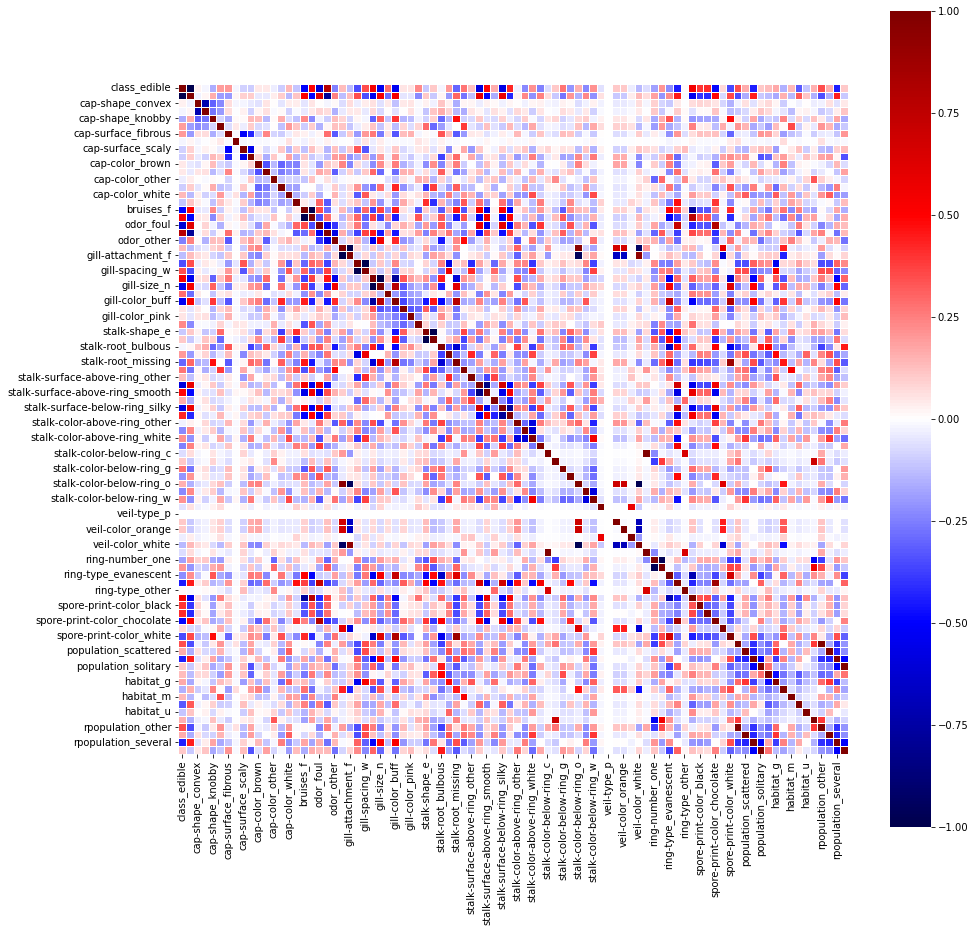

In [54]:
# Print confusion matrix for LR
lr_confusion = metrics.confusion_matrix(y_train, y_train_hat)

#plt.figure(dpi=150)
#sns.heatmap(lr_confusion, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=raw_data['class'],
#yticklabels=raw_data['class'])

plt.figure(figsize=(15,15))
sns.heatmap(dummy_df.corr(), center=0, cmap='seismic', square=True, linewidth=-1, vmax=1);

#plt.xlabel('Predicted edibility')
#plt.ylabel('Actual edibility')
#plt.title('LR Confusion Matrix')

In [35]:
mvp_lr_prediction_test = mvp_lr.predict(X_valid)
mvp_lr_proba_test = mvp_lr.predict_proba(X_valid)[:,1]

train_accuracy = metrics.accuracy_score(y_valid, mvp_lr_prediction_test)*100
train_auc_roc = metrics.roc_auc_score(y_valid, mvp_lr_proba_test)*100

print('Logistic Regression Confusion matrix:\n', metrics.confusion_matrix(y_valid, mvp_lr_prediction_test))
print('Logistic Regression Test AUC: %.4f %%' % train_auc_roc)
print('Logistic Regression Test accuracy: %.4f %%' % train_accuracy)
print(metrics.classification_report(y_valid, mvp_lr_prediction_test))

Logistic Regression Confusion matrix:
 [[851   0]
 [  1 773]]
Logistic Regression Test AUC: 99.9998 %
Logistic Regression Test accuracy: 99.9385 %
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       851
   poisonous       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



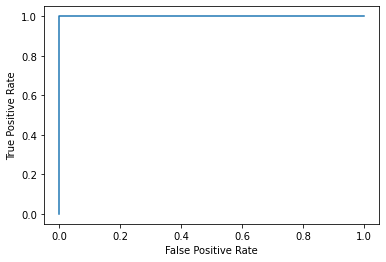

In [36]:
#define metrics
y_pred_proba = mvp_lr.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba, pos_label='poisonous')

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
mvp_knn = KNeighborsClassifier()

mvp_knn.fit(X_train, y_train.values.ravel())

y_train_hat = mvp_knn.predict(X_train)
y_train_hat_probs = mvp_knn.predict_proba(X_train)[:,1]

train_accuracy = metrics.accuracy_score(y_train, y_train_hat)*100
train_auc_roc = metrics.roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', metrics.confusion_matrix(y_train, y_train_hat))
print('Training AUC: %.4f %%' % train_auc_roc)
print('Training accuracy: %.4f %%' % train_accuracy)
print(metrics.classification_report(y_train, y_train_hat))

Confusion matrix:
 [[3357    0]
 [   0 3142]]
Training AUC: 100.0000 %
Training accuracy: 100.0000 %
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      3357
   poisonous       1.00      1.00      1.00      3142

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



In [ ]:
# Print confusion matrix for kNN
knn_confusion = confusion_matrix(y_valid, mvp_knn.predict(X_valid))

plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=raw_data['class'],
yticklabels=raw_data['class'])

plt.xlabel('Predicted edibility')
plt.ylabel('Actual edibility')
plt.title('kNN Confusion Matrix')

In [39]:
mvp_knn_prediction_test = mvp_knn.predict(X_valid)
mvp_knn_proba_test = mvp_knn.predict_proba(X_valid)[:,1]

train_accuracy = metrics.accuracy_score(y_valid, mvp_knn_prediction_test)*100
train_auc_roc = metrics.roc_auc_score(y_valid, mvp_knn_proba_test)*100

print('kNN Confusion matrix:\n', metrics.confusion_matrix(y_valid, mvp_knn_prediction_test))
print('kNN Test AUC: %.4f %%' % train_auc_roc)
print('kNN Test accuracy: %.4f %%' % train_accuracy)
print(metrics.classification_report(y_valid, mvp_knn_prediction_test))

kNN Confusion matrix:
 [[851   0]
 [  0 774]]
kNN Test AUC: 100.0000 %
kNN Test accuracy: 100.0000 %
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       851
   poisonous       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



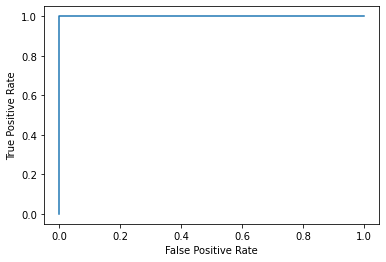

In [40]:
#define metrics
y_pred_proba = mvp_knn.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba, pos_label='poisonous')

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
mvp_tree = DecisionTreeClassifier()

mvp_tree.fit(X_train, y_train)

y_train_hat = mvp_tree.predict(X_train)
y_train_hat_probs = mvp_tree.predict_proba(X_train)[:,1]

train_accuracy = metrics.accuracy_score(y_train, y_train_hat)*100
train_auc_roc = metrics.roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', metrics.confusion_matrix(y_train, y_train_hat))
print('Training AUC: %.4f %%' % train_auc_roc)
print('Training accuracy: %.4f %%' % train_accuracy)
print(metrics.classification_report(y_train, y_train_hat))

# Print confusion matrix for decision tree
#dt_confusion = confusion_matrix(y_valid, mvp_tree.predict(X_valid))

#plt.figure(dpi=150)
#sns.heatmap(dt_confusion, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=raw_data['class'],
#yticklabels=raw_data['class'])

#plt.xlabel('Predicted edibility')
#plt.ylabel('Actual edibility')
#plt.title('DT Confusion Matrix')

Confusion matrix:
 [[3357    0]
 [   0 3142]]
Training AUC: 100.0000 %
Training accuracy: 100.0000 %
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      3357
   poisonous       1.00      1.00      1.00      3142

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



In [43]:
mvp_tree_prediction_test = mvp_tree.predict(X_valid)
mvp_tree_proba_test = mvp_tree.predict_proba(X_valid)[:,1]

train_accuracy = metrics.accuracy_score(y_valid, mvp_tree_prediction_test)*100
train_auc_roc = metrics.roc_auc_score(y_valid, mvp_tree_proba_test)*100

print('Decision Tree Confusion matrix:\n', metrics.confusion_matrix(y_valid, mvp_tree_prediction_test))
print('Decision Tree Test AUC: %.4f %%' % train_auc_roc)
print('Decision Tree accuracy: %.4f %%' % train_accuracy)
print(metrics.classification_report(y_valid, mvp_tree_prediction_test))

Decision Tree Confusion matrix:
 [[851   0]
 [  0 774]]
Decision Tree Test AUC: 100.0000 %
Decision Tree accuracy: 100.0000 %
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       851
   poisonous       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



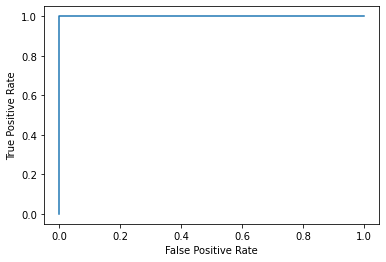

In [44]:
#define metrics
y_pred_proba = mvp_tree.predict_proba(X_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba, pos_label='poisonous')

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
mvp_rf = RandomForestRegressor()

mvp_rf.fit(X_train2, y_train2)

y_train2_hat = mvp_rf.predict(X_train2)

scores = cross_val_score(mvp_rf, y_train2, y_train2_hat, cv=10, scoring='neg_mean_absolute_error')
print(scores)
#print(classification_report(y_train2, y_train2_hat))
#predictions = cross_val_predict(mvp_rf, X_train2, y_train2, cv=10)

#y_train_hat2 = mvp_rf.predict(X_train2)
#y_train_hat_probs2 = mvp_rf.predict_proba(X_train2)[:,1]

#train_accuracy2 = accuracy_score(y_train2, y_train_hat2)*100
#train_auc_roc2 = roc_auc_score(y_train2, y_train_hat_probs2)*100

#print('Confusion matrix:\n', confusion_matrix(y_train2, y_train_hat2))
#print('Training AUC: %.4f %%' % train_auc_roc2)
#print('Training accuracy: %.4f %%' % train_accuracy2)

[-5.28593385e-06 -3.24386223e-05 -1.84290993e-05 -5.52797543e-06
 -4.84780952e-06 -5.43628834e-06 -5.16820454e-06 -4.98971844e-06
 -4.66552583e-06 -4.90763271e-06]


## 1/16 Check-in w/ Don:

- [ ] Are my models not working because I am inputting strings?

- [ ] Feature Selection?

- [ ] Feature Engineering? Ordinal? Dummies? Something else?
 
- [ ] Am I on the right track once I get the data to be numeric?

- group histograms by target class